In many real life situations, we need to classify data into multiple classes. We will be using the iris data set to do the multi class classification. It is a very famous data set. It is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

The four features of the Iris dataset:

sepal length in cm

sepal width in cm

petal length in cm

petal width in cm


One versus all is a strategy that can be implemented using SciKit learn to perform multi-class classification. This method works by performing a logistic regression for binary classification for each possible class.


## Data Formatting

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [4]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import the data
iris = load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Let's put the data into a pandas DataFrame.

In [5]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

If we look at the iris_target data, we'll notice that the Species are still defined as either 0,1,or 2. Let's go ahead and use apply() to split the column, apply a naming scheme function, and then combine it back together.

In [6]:
def flower(num):
    ''' Takes in numerical class, returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

# Apply
iris_target['Species'] = iris_target['Species'].apply(flower)

In [7]:
#Check
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [8]:
# Create a combined Iris DataSet
iris = pd.concat([iris_data,iris_target],axis=1)

# Preview all data
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Step 4: Data Visualization Analysis
Let's do some quick visualizations of the data. We can actually do a very broad and quick birds eye view with seaborn's pairplot.

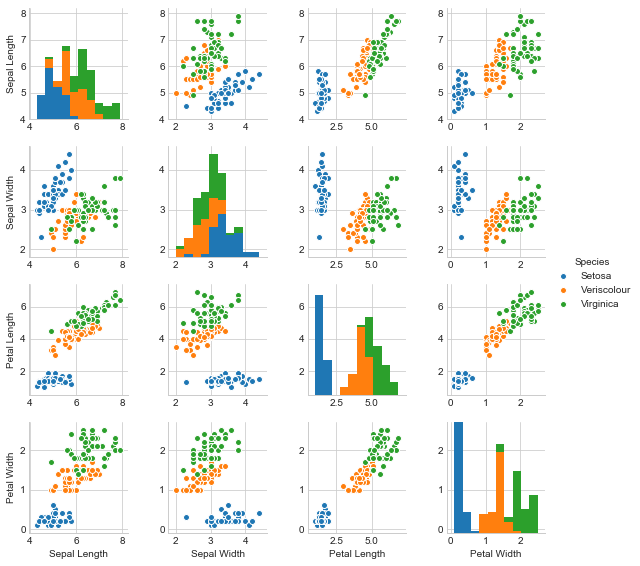

In [9]:
# First a pairplot of all the different features
sns.pairplot(iris,hue='Species',size=2)

A quick observation with this visualization allows us to see that Iris type Setosa has the most distinct features out of the three types.

We can also use the seaborn to perform histograms for all the species on a particular feature. For example, let's examine the petal length distributions for all the Species.

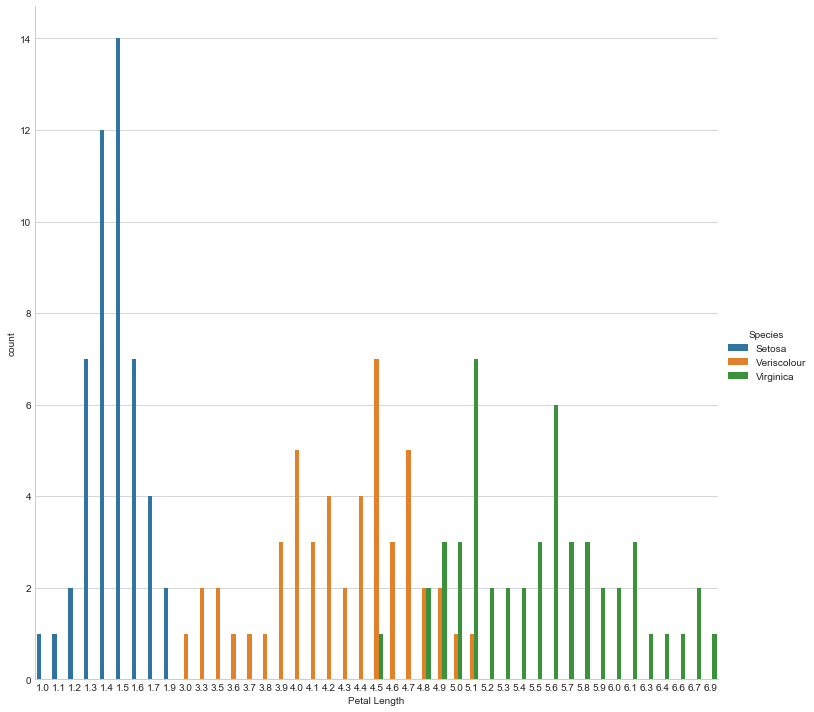

In [11]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind = 'count')

 The result is that Sentosa has the highest petal length.


## Multi-Class Classification with Sci Kit Learn

We already have X and Y defined as the Data Features and Target so let's go ahead and continue with those arrays. We will then have to split the data into Testing and Training sets. I'll pass a test_size argument to have the testing data be 40% of the total data set. I'll also pass a random seed number.

In [12]:
# Import SciKit Learn Log Reg
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# Create a Logistic Regression Class object
logreg = LogisticRegression()

# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

# Train the model with the training set
logreg.fit(X_train, Y_train)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we've trained our model with a training set, let's test our accuracy with the testing set. We'll make a prediction using our model and then check its accuracy.

In [14]:
# Import testing metrics from SciKit Learn
from sklearn import metrics

# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Check accuracy
print (metrics.accuracy_score(Y_test,Y_pred))

0.933333333333


Therefore, quite a high percentage of accuracy.

## K-Nearest Neighbors

This is another algorithm to implement the multiclass classification. The algorithm states that “Given an object to be assigned to a class in a feature space, select the class that is "nearest" to the negihbors in the training set.” This 'nearness" is a distance, which is usually a Euclidean distance.

To classify a new data point in our testing data,we just expand a specific distance away from our feature space until we hit k number of other data points. But for a binary classification using this method, we must choose an odd number for k, to avoid the case of a "tied" distance between two classes.


### kNN with SciKit Learn

In [16]:
#Import from SciKit Learn
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print (metrics.accuracy_score(Y_test,Y_pred))

0.95


Looks like using k=6 got us around 95% accuracy. Let's see what happens if we reduce that value to k=1, that means the closest point in the feature space to our testing data point will be the class the testing point joins.

In [18]:
# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print (metrics.accuracy_score(Y_test,Y_pred))

0.966666666667


Looks like using k=1 got us around 96% accuracy. Let's cycle through various k values and find the optimal value.

In [19]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0,0.5,'Testing Accuracy')

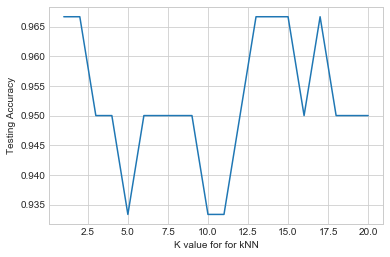

In [20]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')